# Question 5 implementation
## Parsa Daghigh
## SID : 810101419

### A) Discriminant Function
$g_1(x) = \ln(π_1) + \ln(p(x|C1)) $ <br>
$g_2(x)= \ln(π_2) + \ln(p(x|C2))$ <br>
$ g_1(x) = -\frac{1}{2} \ln(2 \pi \sigma_1^2) - \frac{(x - \mu_1)^2}{2 \sigma_1^2} + \ln(\pi_1) $ <br> <br>
$ g_2(x) = -\frac{1}{2} \ln(2 \pi \sigma_2^2) - \frac{(x - \mu_2)^2}{2 \sigma_2^2} + \ln(\pi_2) $ <br> <br>


$g(x) = g_1(x) - g_2(x)$ <br>
$g(x) = \ln(π_1) - \ln(π_2) + \ln(p(x|C1)) - \ln(p(x|C2))$ <br>

$==> g(x) = \ln(π_1) - \ln(π_2) + \frac{1}{2} \ln(2 \pi \sigma_2^2)) -\frac{1}{2} \ln(2 \pi \sigma_1^2) + \frac{(x - \mu_2)^2}{2 \sigma_2^2} - \frac{(x - \mu_1)^2}{2 \sigma_1^2}$ <br> <br>


### B) Decision Boundary for minimum risk and cost

$ g(x) = 0 $ <br>
$ \ln(π_1) - \ln(π_2) + \frac{1}{2} \ln(2 \pi \sigma_2^2)) -\frac{1}{2} \ln(2 \pi \sigma_1^2) + \frac{(x - \mu_2)^2}{2 \sigma_2^2} - \frac{(x - \mu_1)^2}{2 \sigma_1^2} = 0$ <br> <br>


### C) Increasing $π_1$ and decreasing $π_2$ affect on decision boundary
Increasing the prior probability $π_1$ and simultaneously decreasing $π_2$ shifts the decision boundary towards the distribution with the lower prior probability. This means that more samples from class 1 will be classified as class 2.

### Import the needed libraries

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

### D) Plot 100 samples for C1 and C2 and draw the decision boundary

$ a = \frac{1}{2\sigma_1^2} - \frac{1}{2\sigma_2^2} $ <br>
$ b = \frac{\mu_2}{\sigma_2^2} - \frac{\mu_1}{\sigma_1^2} $ <br>
$ c = \frac{\mu_12}{2\sigma_12} - \frac{\mu_22}{2\sigma_22} + \ln\left(\frac{\sigma_2}{\sigma_1}\right) + \ln\left(\frac{\pi_1}{\pi_2}\right) $


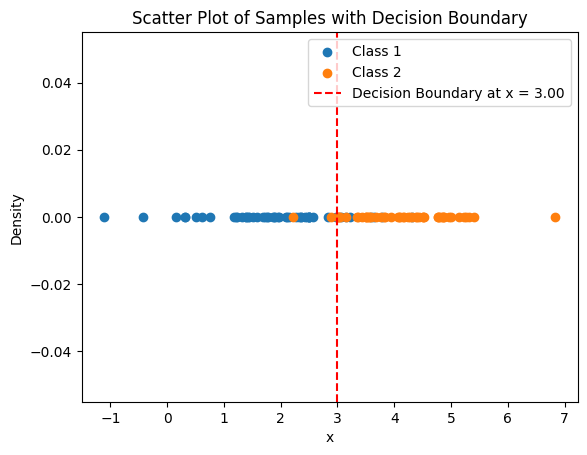

Predicted Labels: [ True  True  True False  True  True  True  True  True False  True  True
  True False False False  True  True  True  True  True  True  True False
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False  True False False False False False False
 False False False False]


In [31]:
mu1, sigma1 = 2, 1
mu2, sigma2 = 4, 1

def discriminant(x, mu, sigma, pi):
    part1 = -0.5 * np.log(2 * np.pi * sigma**2)
    part2 = -0.5 * ((x - mu)**2 / sigma**2)
    part3 = np.log(pi)
    return part1 + part2 + part3

def find_decision_boundary(mu1, sigma1, pi1, mu2, sigma2, pi2):
    a = 1 / (2 * sigma1**2) - 1 / (2 * sigma2**2)
    b = mu2 / (sigma2**2) - mu1 / (sigma1**2)
    c = mu1**2 / (2 * sigma1**2) - mu2**2 / (2 * sigma2**2) + np.log(sigma2 / sigma1) + np.log(pi1 / pi2)

    if a == 0:  # If a is zero, it means the quadratic term is zero, so we solve a linear equation
        return np.array([-c / b])
    else:
        discriminant = b**2 - 4 * a * c
        if discriminant >= 0:
            root1 = (-b + np.sqrt(discriminant)) / (2 * a)
            root2 = (-b - np.sqrt(discriminant)) / (2 * a)
            return np.array([root1, root2])
        else:
            return np.array([])  # No real roots

n_samples = 100
pi1, pi2 = 0.5, 0.5
class1_samples = np.random.normal(mu1, sigma1, int(n_samples * pi1))
class2_samples = np.random.normal(mu2, sigma2, int(n_samples * pi2))

labels_class1 = np.ones(int(n_samples * pi1))
labels_class2 = np.zeros(int(n_samples * pi2))

samples = np.concatenate([class1_samples, class2_samples])
labels = np.concatenate([labels_class1, labels_class2])

discriminant_values = discriminant(samples, mu1, sigma1, pi1) - discriminant(samples, mu2, sigma2, pi2)

predicted_labels = discriminant_values >= 0

plt.scatter(class1_samples, np.zeros_like(class1_samples), label='Class 1')
plt.scatter(class2_samples, np.zeros_like(class2_samples), label='Class 2')

decision_boundaries = find_decision_boundary(mu1, sigma1, pi1, mu2, sigma2, pi2)
for boundary in decision_boundaries:
    plt.axvline(x=boundary, color='red', linestyle='--', label=f'Decision Boundary at x = {boundary:.2f}')

plt.legend()
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Scatter Plot of Samples with Decision Boundary')
plt.show()

print(f"Predicted Labels: {predicted_labels}")


### E) Creating lables with the Decision Boundary and report the metrics like Accuracy, Precision, ...

In [32]:
conf_matrix = confusion_matrix(labels, predicted_labels)
print(f"Confusion Matrix:\n{conf_matrix}")

accuracy = accuracy_score(labels, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(labels, predicted_labels)
print(f"Precision: {precision:.2f}")

recall = recall_score(labels, predicted_labels)
print(f"Recall: {recall:.2f}")

f1 = f1_score(labels, predicted_labels)
print(f"F1 Score: {f1:.2f}")



Confusion Matrix:
[[48  2]
 [ 7 43]]
Accuracy: 0.91
Precision: 0.96
Recall: 0.86
F1 Score: 0.91


### F) ROC curve and calculate AUROC

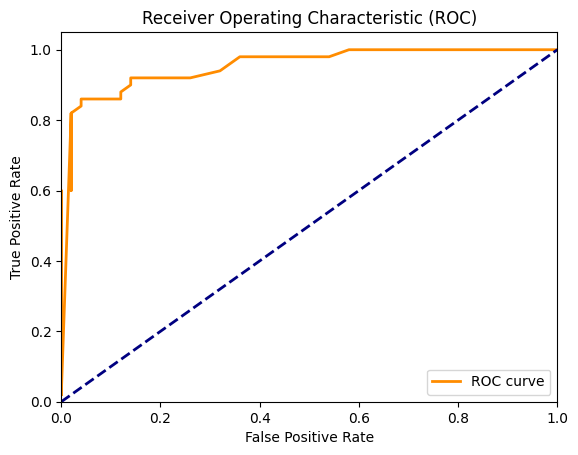

AUROC: 0.95


In [33]:
thresholds = np.linspace(min(discriminant_values), max(discriminant_values), 100)
tpr = []
fpr = []

for threshold in thresholds:
    tp = fp = fn = tn = 0
    for i in range(len(labels)):
        if discriminant_values[i] >= threshold:
            if labels[i] == 1:
                tp += 1
            else:
                fp += 1
        else:
            if labels[i] == 1:
                fn += 1
            else:
                tn += 1
    tpr.append(tp / (tp + fn) if tp + fn != 0 else 0)
    fpr.append(fp / (fp + tn) if fp + tn != 0 else 0)

tpr = np.array(tpr)
fpr = np.array(fpr)
sorted_indices = np.argsort(fpr)
tpr = tpr[sorted_indices]
fpr = fpr[sorted_indices]

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Calculate AUROC
auroc = np.trapz(tpr, fpr)
print(f"AUROC: {auroc:.2f}")


### G) analysing the result for $π_1 = 0.9$ and $π_2 = 0.1$

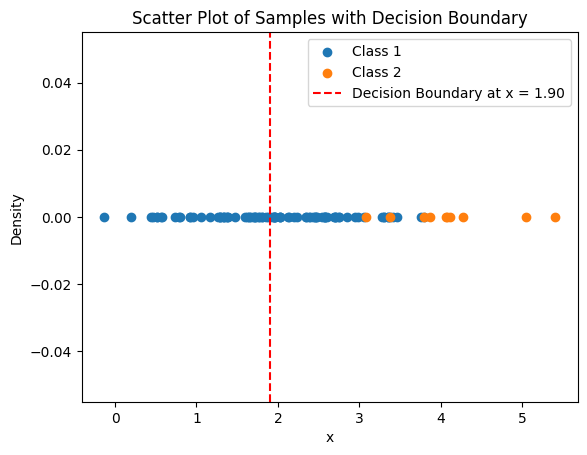

Predicted Labels: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True False  True
  True  True False False]


In [34]:
pi1, pi2 = 0.9, 0.1
class1_samples = np.random.normal(mu1, sigma1, int(n_samples * pi1))
class2_samples = np.random.normal(mu2, sigma2, int(n_samples * pi2))

labels_class1 = np.ones(int(n_samples * pi1))
labels_class2 = np.zeros(int(n_samples * pi2))

samples = np.concatenate([class1_samples, class2_samples])
labels = np.concatenate([labels_class1, labels_class2])

discriminant_values = discriminant(samples, mu1, sigma1, pi1) - discriminant(samples, mu2, sigma2, pi2)

predicted_labels = discriminant_values >= 0

plt.scatter(class1_samples, np.zeros_like(class1_samples), label='Class 1')
plt.scatter(class2_samples, np.zeros_like(class2_samples), label='Class 2')

decision_boundaries = find_decision_boundary(mu1, sigma1, pi1, mu2, sigma2, pi2)
for boundary in decision_boundaries:
    plt.axvline(x=boundary, color='red', linestyle='--', label=f'Decision Boundary at x = {boundary:.2f}')

plt.legend()
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Scatter Plot of Samples with Decision Boundary')
plt.show()

print(f"Predicted Labels: {predicted_labels}")


In [35]:
conf_matrix = confusion_matrix(labels, predicted_labels)
print(f"Confusion Matrix:\n{conf_matrix}")

accuracy = accuracy_score(labels, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(labels, predicted_labels)
print(f"Precision: {precision:.2f}")

recall = recall_score(labels, predicted_labels)
print(f"Recall: {recall:.2f}")

f1 = f1_score(labels, predicted_labels)
print(f"F1 Score: {f1:.2f}")



Confusion Matrix:
[[ 4  6]
 [ 0 90]]
Accuracy: 0.94
Precision: 0.94
Recall: 1.00
F1 Score: 0.97


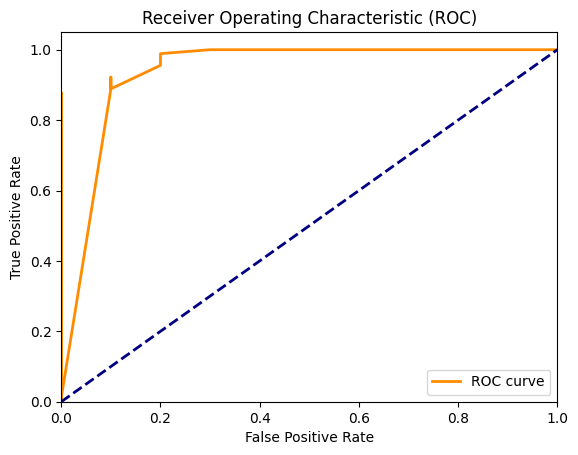

AUROC: 0.94


In [36]:
mu1, sigma1 = 2, 1
mu2, sigma2 = 4, 1
pi1, pi2 = 0.9, 0.1

thresholds = np.linspace(min(discriminant_values), max(discriminant_values), 100)
tpr = []
fpr = []

for threshold in thresholds:
    tp = fp = fn = tn = 0
    for i in range(len(labels)):
        if discriminant_values[i] >= threshold:
            if labels[i] == 1:
                tp += 1
            else:
                fp += 1
        else:
            if labels[i] == 1:
                fn += 1
            else:
                tn += 1
    tpr.append(tp / (tp + fn) if tp + fn != 0 else 0)
    fpr.append(fp / (fp + tn) if fp + tn != 0 else 0)

tpr = np.array(tpr)
fpr = np.array(fpr)
sorted_indices = np.argsort(fpr)
tpr = tpr[sorted_indices]
fpr = fpr[sorted_indices]

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Calculate AUROC
auroc = np.trapz(tpr, fpr)
print(f"AUROC: {auroc:.2f}")


### Results
As we can see the second model has more accuracy and metrics and can predict better.